# Exploration

Working on the saved dataframe

In [2]:
import pandas as pd

dataframe = pd.read_csv('yFinance 2014-07-30 to 2024-07-30.csv')

In [3]:
dataframe.head().style.background_gradient(cmap='magma')

,company_name,ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Amazon,AMZN,2014-07-30,16.072500,16.136499,15.925000,16.125500,16.125500,79380000
1,Amazon,AMZN,2014-07-31,16.000500,16.034000,15.593000,15.649500,15.649500,103840000
2,Amazon,AMZN,2014-08-01,15.684500,15.791500,15.229500,15.353000,15.353000,148830000
3,Amazon,AMZN,2014-08-04,15.442000,15.809000,15.425000,15.682500,15.682500,84018000
4,Amazon,AMZN,2014-08-05,15.665000,15.727500,15.503000,15.616000,15.616000,57042000


In [4]:
amzn_dataframe = dataframe[dataframe['ticker'] == 'AMZN']

In [5]:
amzn_dataframe.head()

,company_name,ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,Amazon,AMZN,2014-07-30,16.0725,16.136499,15.9250,16.1255,16.1255,79380000
1,Amazon,AMZN,2014-07-31,16.0005,16.034000,15.5930,15.6495,15.6495,103840000
2,Amazon,AMZN,2014-08-01,15.6845,15.791500,15.2295,15.3530,15.3530,148830000
3,Amazon,AMZN,2014-08-04,15.4420,15.809000,15.4250,15.6825,15.6825,84018000
4,Amazon,AMZN,2014-08-05,15.6650,15.727500,15.5030,15.6160,15.6160,57042000


In [6]:
amzn_dataframe.shape

(2516, 9)

Checking missing values

In [7]:
amzn_dataframe.isna().sum()

company_name    0
ticker          0
Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
dtype: int64

Checking datatypes

In [8]:
amzn_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company_name  2516 non-null   object 
 1   ticker        2516 non-null   object 
 2   Date          2516 non-null   object 
 3   Open          2516 non-null   float64
 4   High          2516 non-null   float64
 5   Low           2516 non-null   float64
 6   Close         2516 non-null   float64
 7   Adj Close     2516 non-null   float64
 8   Volume        2516 non-null   int64  
dtypes: float64(5), int64(1), object(3)
memory usage: 196.6+ KB


In [9]:
amzn_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2516.0,9.361686e+01,5.299573e+01,1.422000e+01,4.170000e+01,9.122575e+01,1.428125e+02,2.000900e+02
High,2516.0,9.468539e+01,5.361611e+01,1.452100e+01,4.196763e+01,9.206650e+01,1.448783e+02,2.012000e+02
Low,2516.0,9.245159e+01,5.231560e+01,1.420000e+01,4.142500e+01,9.026150e+01,1.406975e+02,1.990500e+02
Close,2516.0,9.358894e+01,5.295657e+01,1.434750e+01,4.178113e+01,9.105900e+01,1.432875e+02,2.000000e+02
Adj Close,2516.0,9.358894e+01,5.295657e+01,1.434750e+01,4.178113e+01,9.105900e+01,1.432875e+02,2.000000e+02
Volume,2516.0,7.769637e+07,4.065696e+07,1.762600e+07,5.222375e+07,6.659170e+07,9.080315e+07,4.771220e+08


In [10]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
amzn_dataframe['Date'] = pd.to_datetime(amzn_dataframe['Date'])

C:\Users\ishaa\AppData\Local\Temp\ipykernel_34532\2418759866.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_dataframe['Date'] = pd.to_datetime(amzn_dataframe['Date'])


In [12]:
amzn_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2516 entries, 0 to 2515
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   company_name  2516 non-null   object        
 1   ticker        2516 non-null   object        
 2   Date          2516 non-null   datetime64[ns]
 3   Open          2516 non-null   float64       
 4   High          2516 non-null   float64       
 5   Low           2516 non-null   float64       
 6   Close         2516 non-null   float64       
 7   Adj Close     2516 non-null   float64       
 8   Volume        2516 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 196.6+ KB


Function for graphs over time

In [13]:
def check_dates(df, start_date, end_date):
    if start_date == None:
        start_date = df['Date'].min()
    if end_date == None:
        end_date = df['Date'].max()
        
    return start_date, end_date

In [14]:
def graph_over_time(df, x, y, start_date = None, end_date = None, xlabel='', ylabel='', title=''):
    plt.style.use('dark_background')
    plt.figure(figsize = (20, 5))

    start_date, end_date = check_dates(df, start_date, end_date)
    
    temp_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

    plt.plot(temp_df[x], temp_df[y], label = y)

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(title)
    plt.legend()
    
    return None

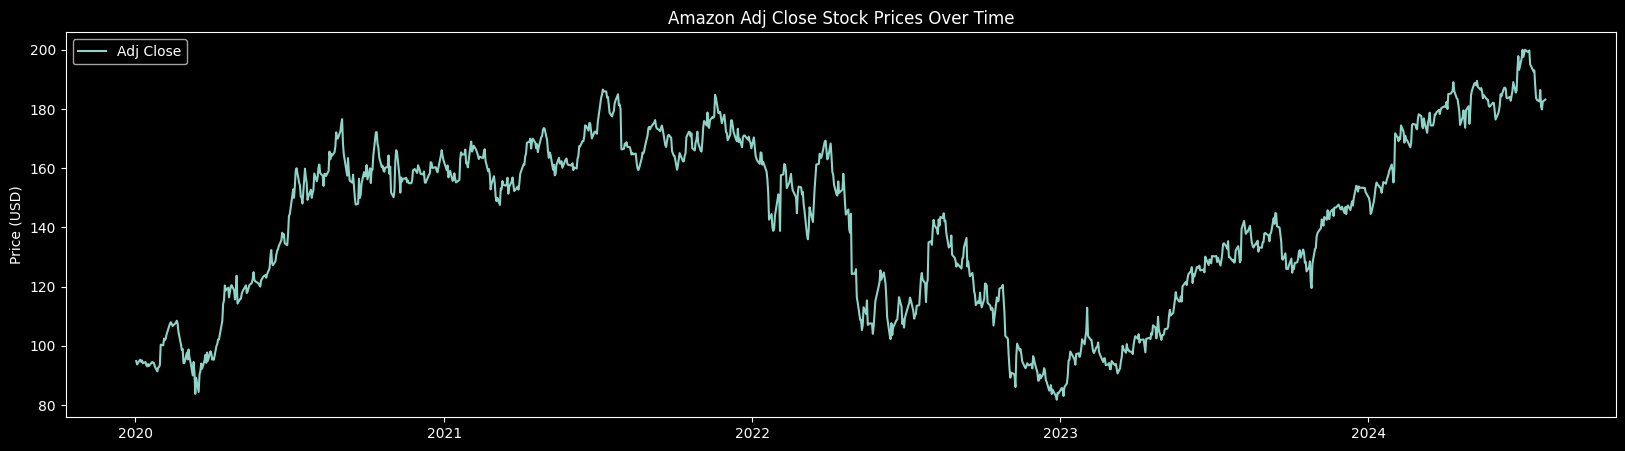

In [15]:
graph_over_time(amzn_dataframe, 'Date', 'Adj Close', start_date='2020-01-01', ylabel = 'Price (USD)', title = 'Amazon Adj Close Stock Prices Over Time')

In [16]:
amzn_dataframe['mav_100'] = amzn_dataframe['Adj Close'].rolling(100).mean()

C:\Users\ishaa\AppData\Local\Temp\ipykernel_34532\865582611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_dataframe['mav_100'] = amzn_dataframe['Adj Close'].rolling(100).mean()


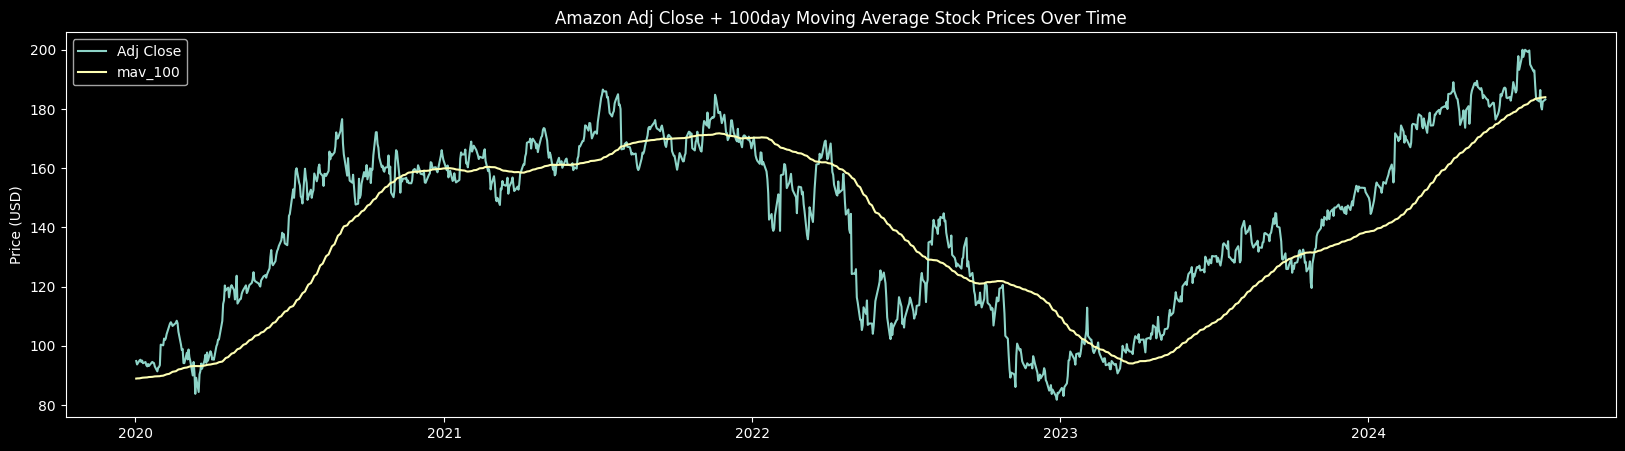

In [17]:
graph_over_time(amzn_dataframe, 'Date', ['Adj Close', 'mav_100'], start_date='2020-01-01', ylabel = 'Price (USD)', title = 'Amazon Adj Close + 100day Moving Average Stock Prices Over Time')

Percentage Change

In [18]:
amzn_dataframe['pct_change'] = amzn_dataframe['Adj Close'].pct_change()

C:\Users\ishaa\AppData\Local\Temp\ipykernel_34532\2217372936.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn_dataframe['pct_change'] = amzn_dataframe['Adj Close'].pct_change()


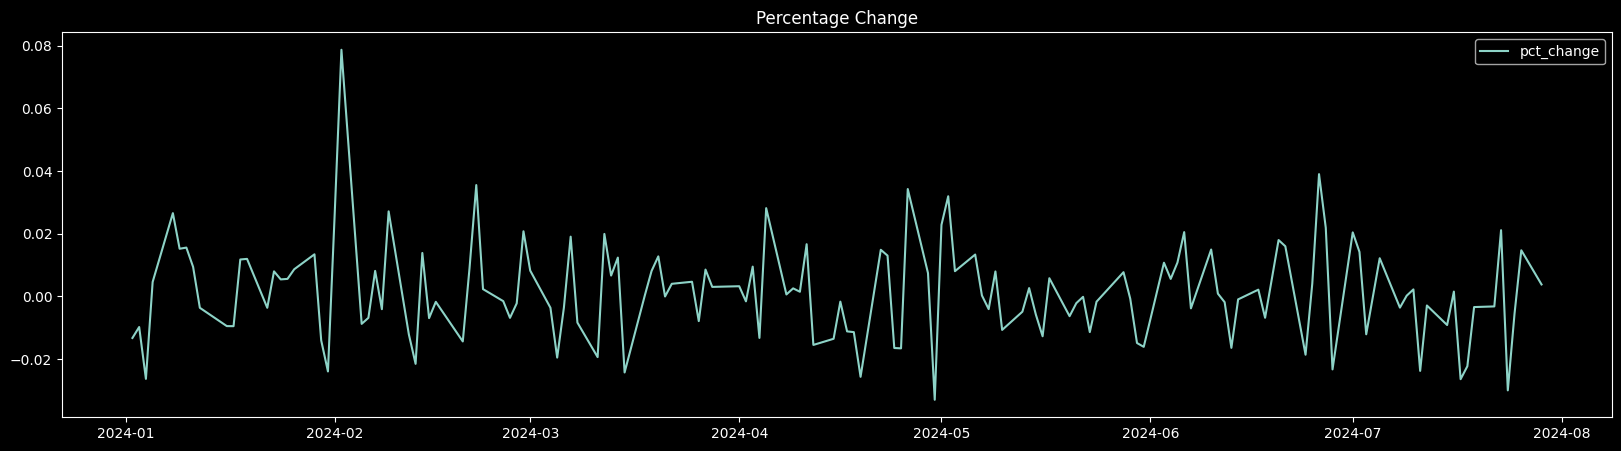

In [19]:
graph_over_time(amzn_dataframe, 'Date', 'pct_change', start_date='2024-01-01', ylabel = '', title = 'Percentage Change')

# Preprocessing

In [20]:
from sklearn.preprocessing import MinMaxScaler

scale = MinMaxScaler(feature_range = (0, 1))

Scaling the prices

In [21]:
adj_close_scaled = scale.fit_transform(amzn_dataframe[['Adj Close']])

In [22]:
adj_close_scaled

array([[0.00957703],
       [0.0070131 ],
       [0.00541603],
       ...,
       [0.89146392],
       [0.90573787],
       [0.90950834]])

In [23]:
print(f'min: {adj_close_scaled.min()}\nmax: {adj_close_scaled.max()}')

min: 0.0
max: 1.0


Using 100 days of adj_close_scaled prices to target the price on the 101th day

In [24]:
import numpy as np

In [25]:
x_values = []
y_values = []

for i in range(100, len(adj_close_scaled)):
    x_values.append(adj_close_scaled[i-100:i])
    y_values.append(adj_close_scaled[i])

Reshaping x_values to be 2 dimentional making the conversion to a dataframe possible

In [26]:
x_values_reshaped = np.array([i.flatten() for i in x_values])

In [27]:
y_values = np.array(y_values)

Saving the data as a dataframe

In [28]:
amzn_pred_data = pd.DataFrame(x_values_reshaped)
amzn_pred_data['target'] = y_values

In [29]:
amzn_pred_data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,0.009577,0.007013,0.005416,0.007191,0.006833,0.007255,0.006598,0.008039,0.008451,0.008718,...,0.005303,0.006881,0.005087,0.005497,0.005486,0.005149,0.002184,0.003213,0.002903,0.003488
1,0.007013,0.005416,0.007191,0.006833,0.007255,0.006598,0.008039,0.008451,0.008718,0.010592,...,0.006881,0.005087,0.005497,0.005486,0.005149,0.002184,0.003213,0.002903,0.003488,0.005276
2,0.005416,0.007191,0.006833,0.007255,0.006598,0.008039,0.008451,0.008718,0.010592,0.012459,...,0.005087,0.005497,0.005486,0.005149,0.002184,0.003213,0.002903,0.003488,0.005276,0.005209
3,0.007191,0.006833,0.007255,0.006598,0.008039,0.008451,0.008718,0.010592,0.012459,0.012572,...,0.005497,0.005486,0.005149,0.002184,0.003213,0.002903,0.003488,0.005276,0.005209,0.004331
4,0.006833,0.007255,0.006598,0.008039,0.008451,0.008718,0.010592,0.012459,0.012572,0.012814,...,0.005486,0.005149,0.002184,0.003213,0.002903,0.003488,0.005276,0.005209,0.004331,0.005963


In [30]:
amzn_pred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Columns: 101 entries, 0 to target
dtypes: float64(101)
memory usage: 1.9 MB


In [31]:
amzn_pred_data.to_csv('amzn_pred_data 2014-07-30 to 2024-07-30.csv', index = False)